p.172

In [1]:
def squareRoot(x, epsilon):
    """xとepsilonは、x >= 0、epsilon > 0を満たすfloat型の変数とする。
       x - epsilon <= y * y <= x + epsilonとなるfloat型のyを出力する"""

In [2]:
def rollDie():
    """1から6までの整数を無作為に選んで出力する"""

p.173

In [3]:
import random

In [4]:
def rollDie():
    """1から6までの整数を無作為に選んで出力する"""
    return random.choice([1,2,3,4,5,6])

In [5]:
def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print result

In [6]:
rollN(10)

6265624563


p.175

In [7]:
def flip(numFlips):
    """numFlipsを整数とする
       コイン投げをnumFlips回実行したときの表の出た割合を返す"""
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads / numFlips

In [8]:
def flipSim(numFlipsPerTrial, numTrials):
    """numFlipsPerTrial、numTrialsを整数とする
       コイン投げを1セットにつきnumFlipsPerTrial回、
       numTrialsセット実行したときの表の出た割合の平均値を返す"""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads) / len(fracHeads)
    return mean

In [9]:
print flipSim(100, 1)

0.45


In [10]:
print flipSim(100, 1)

0.53


In [11]:
print flipSim(100, 100)

0.5092


In [12]:
print flipSim(100, 100)

0.4962


In [13]:
print flipSim(100, 100000)

0.4996789


In [14]:
print flipSim(100, 100000)

0.5001171


p.176

In [15]:
import pylab

In [16]:
def flipPlot(minExp, maxExp):
    """minExp と maxExp を minExp < maxExp を満たす正の整数とする
       2**minExp から 2**maxExp 回のコイン投げの結果をプロットする"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2 ** exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads / float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.figure(dpi=125)
    pylab.title(u'表裏の差')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'|表の回数 - 裏の回数|')
    pylab.plot(xAxis, diffs)
    pylab.figure(dpi=125)
    pylab.title(u'表/裏の比')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'表の回数/裏の回数')
    pylab.plot(xAxis, ratios)

p.177

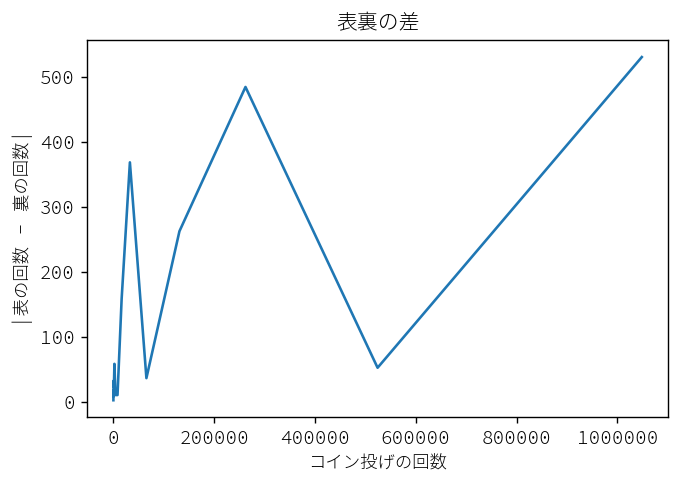

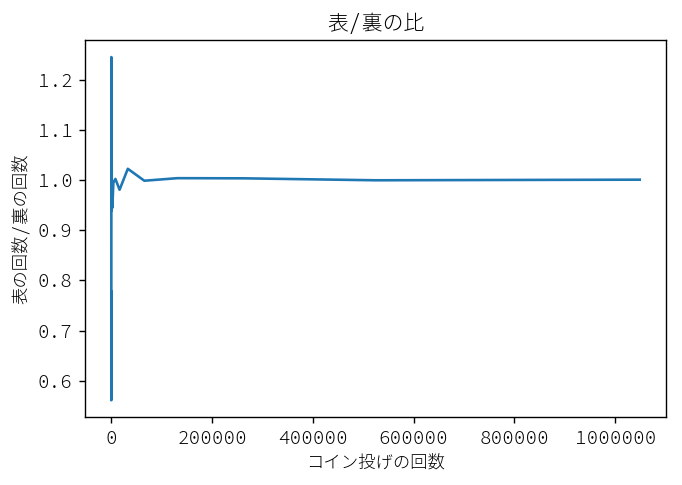

In [17]:
random.seed(0)
flipPlot(4, 20)

p.178

In [18]:
# 指練習
def flipPlot(minExp, maxExp):
    """minExp と maxExp を minExp < maxExp を満たす正の整数とする
       2**minExp から 2**maxExp 回のコイン投げの結果をプロットする"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2 ** exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.figure(dpi=125)
    pylab.title(u'表裏の差')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'|表の回数 - 裏の回数|')
    pylab.semilogx()
    pylab.semilogy()
    pylab.plot(xAxis, diffs, 'bo')
    pylab.figure(dpi=125)
    pylab.title(u'表/裏の比')
    pylab.xlabel(u'コイン投げの回数')
    pylab.ylabel(u'表の回数/裏の回数')
    pylab.semilogx()
    pylab.plot(xAxis, ratios, 'bo')

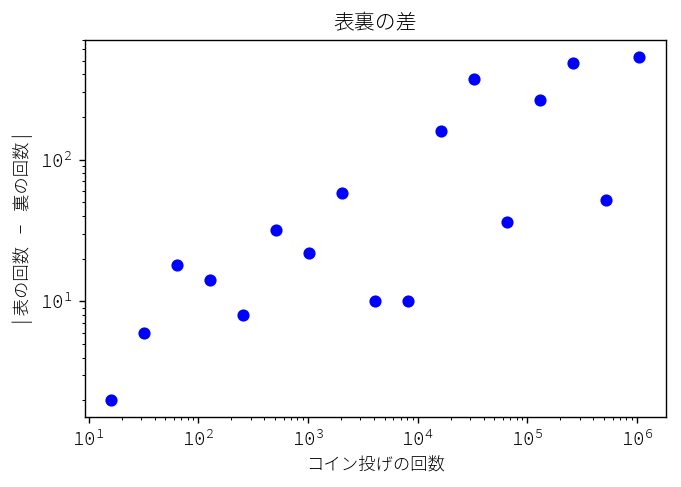

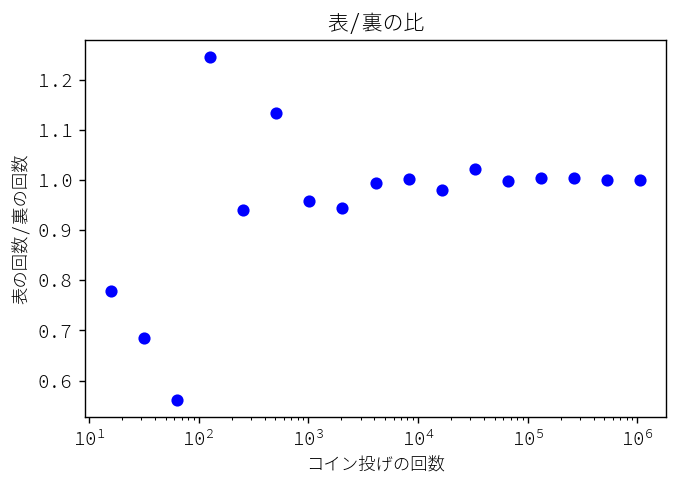

In [19]:
random.seed(0)
flipPlot(4, 20)

p.178

In [20]:
def variance(X):
    """Xを数のリストとする
       Xの分散を返す"""
    mean = sum(X) / len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    return tot / len(X)

In [21]:
def stdDev(X):
    """Xを数のリストとする
       Xの標準偏差を返す"""
    return variance(X) ** 0.5

In [22]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style,
             logX = False, logY = False):
    """xVal に対する yVal の値を，題名と軸名入りでプロットする"""
    pylab.figure(dpi=125)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

In [23]:
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

In [24]:
def flipPlot(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする
       2**minExp から 2**maxExp 回のコイン投げを numTrials 回
       行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + u'回試行)'
    title = u'表/裏の比の平均値' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             u'コイン投げの回数', u'表/裏の平均', 'bo', logX = True)
    title = u'表/裏の比の標準偏差' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             u'コイン投げの回数', u'表/裏の標準偏差', 'bo',
             logX = True, logY = True)

p.180

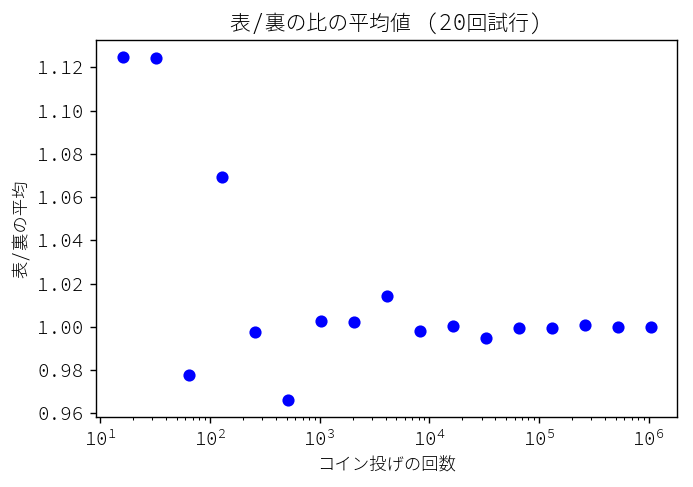

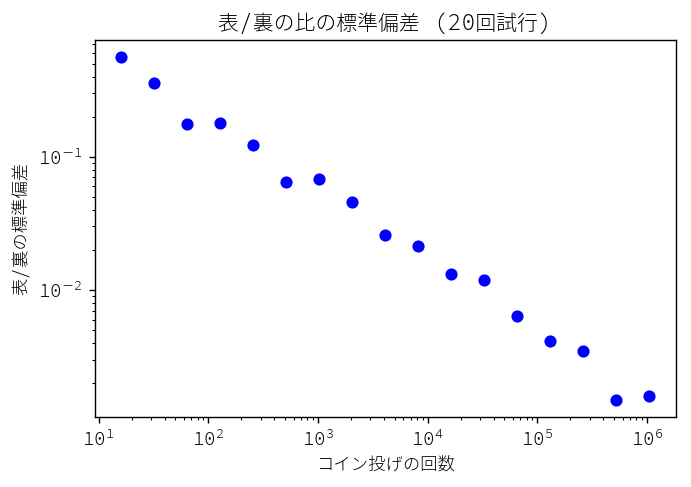

In [25]:
flipPlot(4, 20, 20)

p.181

In [26]:
def flipPlot(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする
       2**minExp から 2**maxExp 回のコイン投げを numTrials 回
       行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + u'回試行)'
    title = u'表/裏の比の平均値' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             u'コイン投げの回数', u'表/裏の平均', 'bo', logX = True)
    title = u'表/裏の比の標準偏差' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             u'コイン投げの回数', u'表/裏の標準偏差', 'bo',
             logX = True, logY = True)
    title = u'|表-裏|の平均' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
             u'コイン投げの回数', u'|表-裏|の平均', 'bo', logX = True, logY = True)
    title = u'|表-裏|の標準偏差' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
             u'コイン投げの回数', u'|表-裏|の標準偏差', 'bo', logX = True, logY = True)

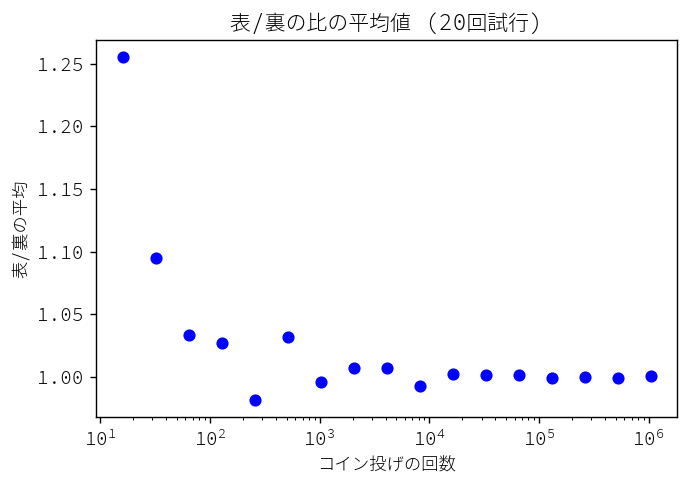

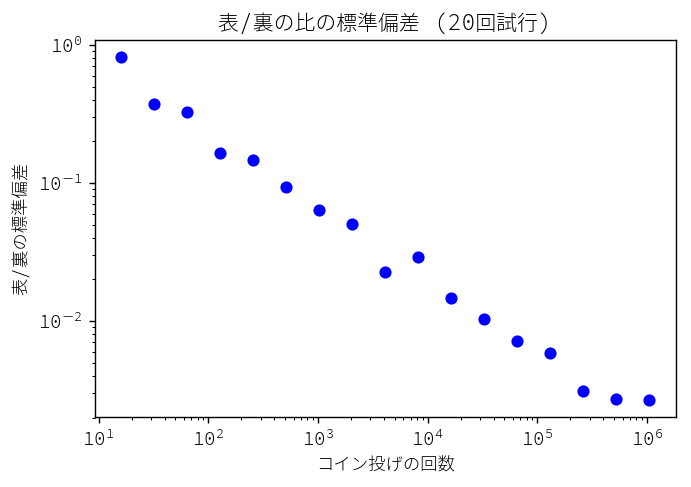

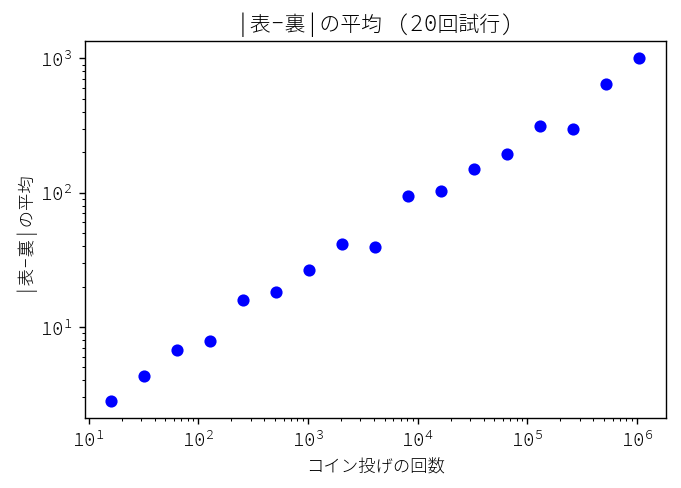

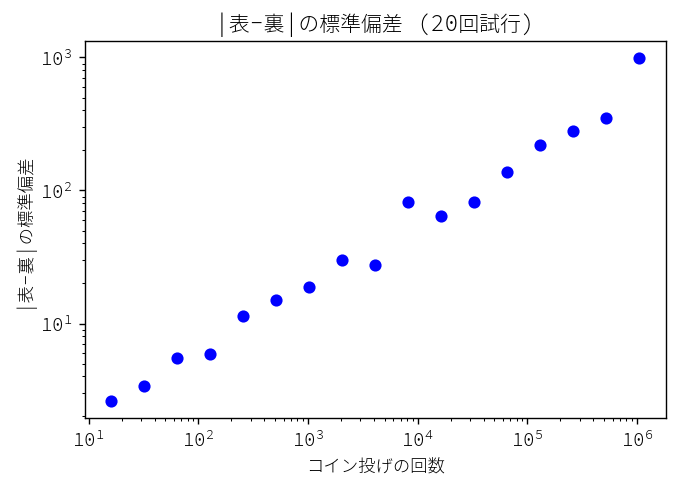

In [27]:
flipPlot(4, 20, 20)

p.182

In [28]:
def CV(X):
    mean = sum(X) / float(len(X))
    try:
        return stdDev(X) / mean
    except ZeroDivisionError:
        return float('nan')

In [29]:
def flipPlot(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする
       2**minExp から 2**maxExp 回のコイン投げを numTrials 回
       行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs = [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/float(numTrials))
        diffsMeans.append(sum(diffs)/float(numTrials))
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = ' (' + str(numTrials) + u'回試行)'
    title = u'表/裏の比の平均' + numTrialsString
    makePlot(xAxis, ratiosMeans, title,
             u'コイン投げの回数', u'表/裏の平均', 'bo', logX = True)
    title = u'表/裏の比の標準偏差' + numTrialsString
    makePlot(xAxis, ratiosSDs, title,
             u'コイン投げの回数', u'標準偏差', 'bo',
             logX = True, logY = True)
    title = u'|表の回数 - 裏の回数|の平均' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
             u'コイン投げの回数', u'|表の回数 - 裏の回数|の平均', 'bo',
             logX = True, logY = True)
    title = u'|表の回数 - 裏の回数|の標準偏差' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
             u'コイン投げの回数', u'標準偏差', 'bo',
             logX = True, logY = True)
    title = u'|表の回数 - 裏の回数|の変動係数' + numTrialsString
    makePlot(xAxis, diffsCVs, title, u'コイン投げの回数',
             u'変動係数', 'bo', logX = True)
    title = u'表/裏の比の変動係数' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, u'コイン投げの回数',
             u'変動係数', 'bo', logX = True, logY = True)

p.183

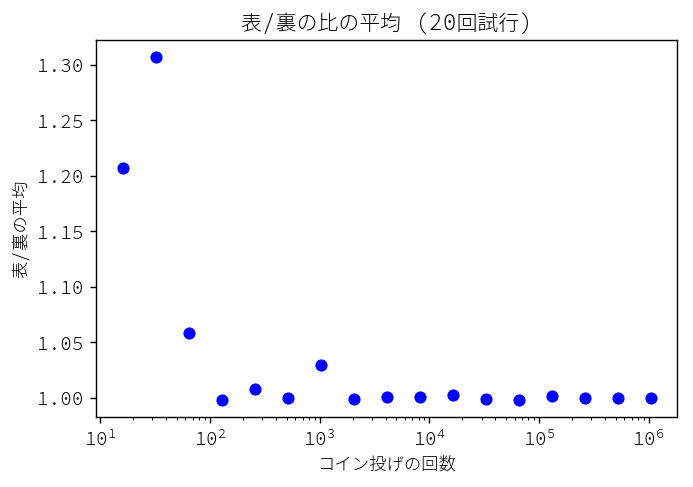

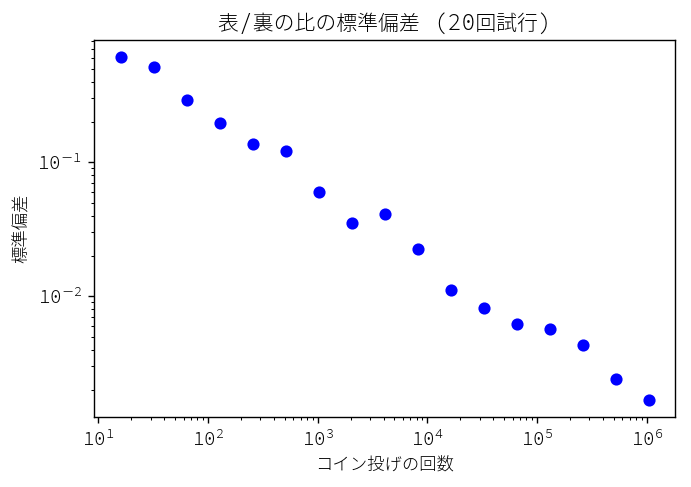

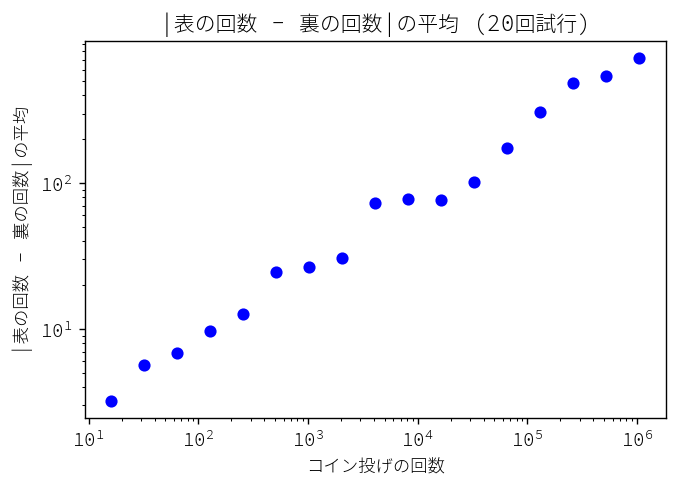

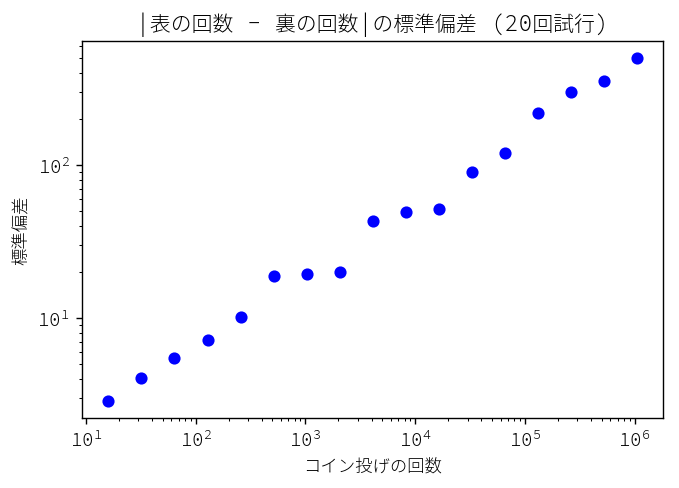

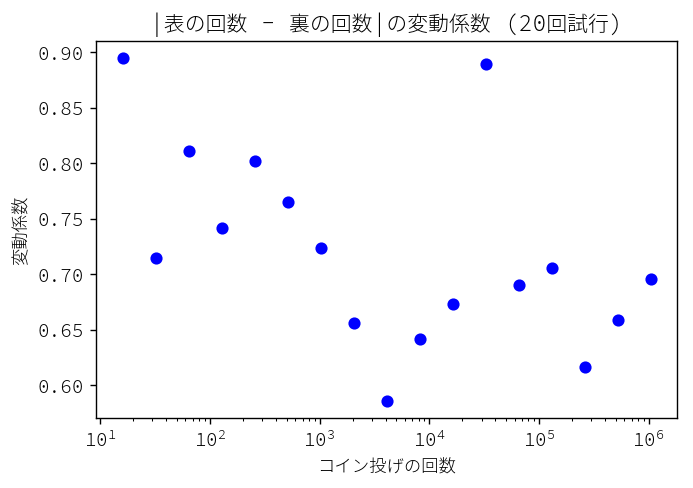

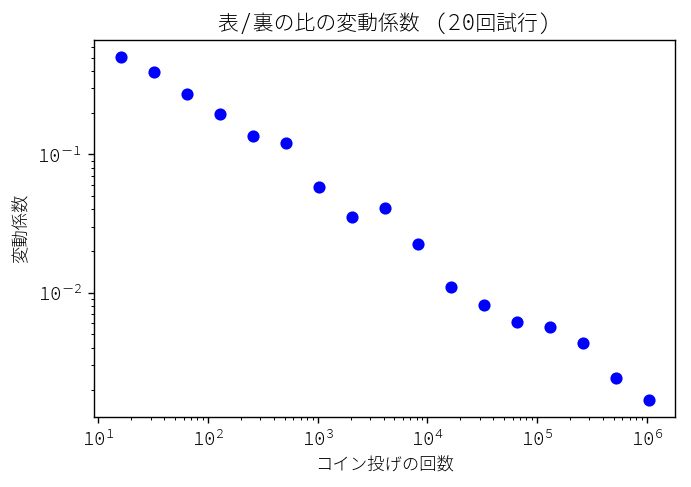

In [30]:
flipPlot(4, 20, 20)

p.184

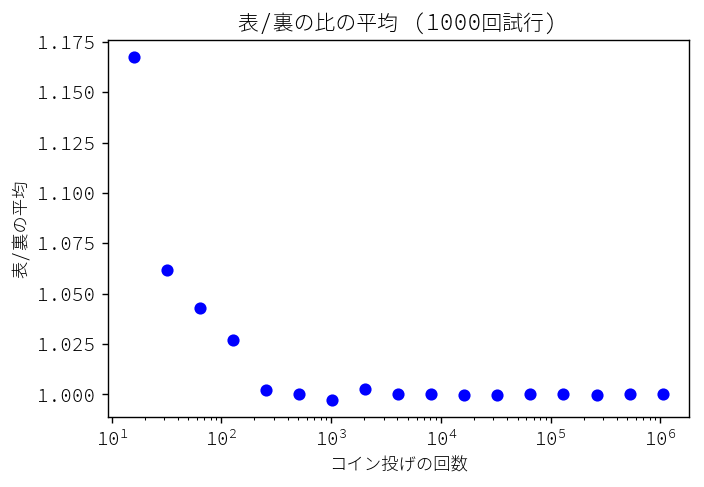

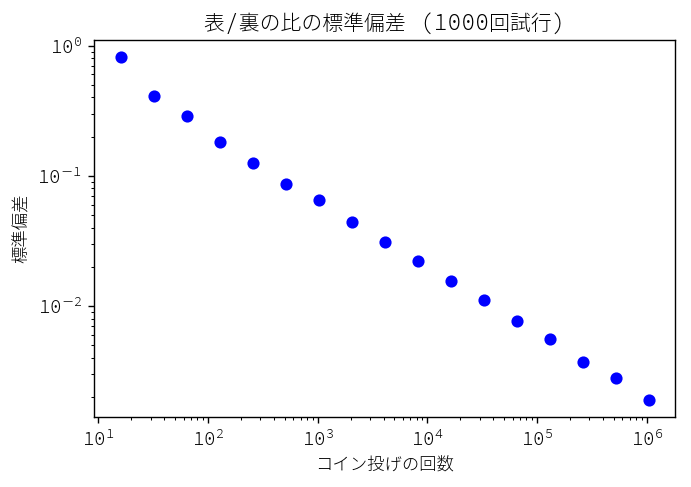

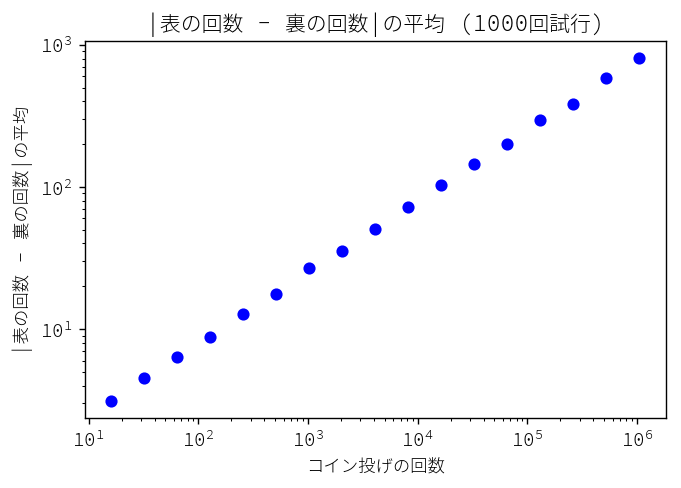

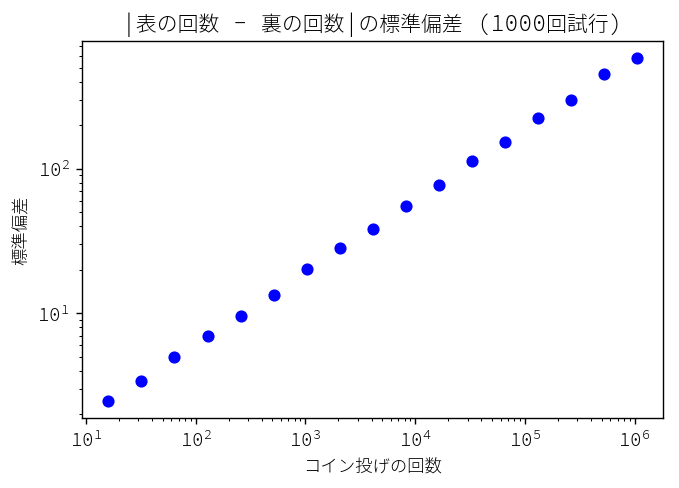

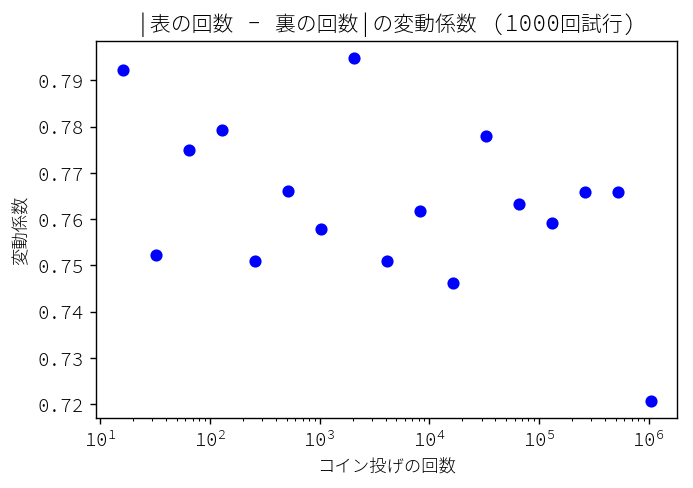

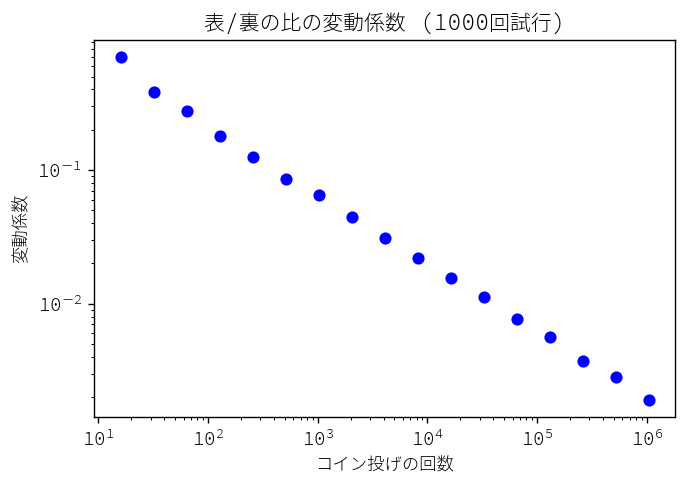

In [31]:
flipPlot(4, 20, 1000)

(array([ 23.,  55., 106., 151., 172., 157., 149., 110.,  63.,  16.]),
 array([  1. ,  20.9,  40.8,  60.7,  80.6, 100.5, 120.4, 140.3, 160.2,
        180.1, 200. ]),
 <a list of 10 Patch objects>)

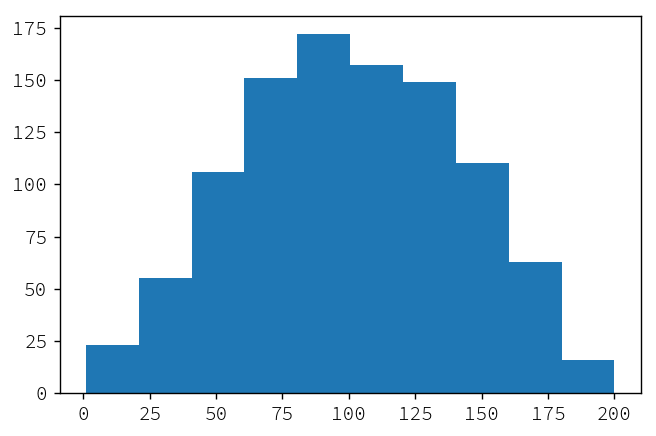

In [32]:
pylab.figure(dpi=125)
vals = [1, 200] # 値が 1 から 200 の範囲にあること仮定
for i in range(1000):
    num1 = random.choice(range(1, 100))
    num2 = random.choice(range(1, 100))
    vals.append(num1+num2)
pylab.hist(vals, bins = 10)

p.185

In [33]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/numFlips

In [34]:
def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads) / len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

In [35]:
def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numFlips) + u'回のコイン投げの' + str(numTrials) + u'の試行')
    pylab.xlabel(u'表の割合')
    pylab.ylabel(u'試行回数')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               u'平均 = ' + str(round(mean, 4))
               + u'\n標準偏差 = ' + str(round(sd, 4)), size='x-large')

In [36]:
def makePlots(numFlips1, numFlips2, numTrials):
    pylab.figure(dpi=125)
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure(dpi=125)
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

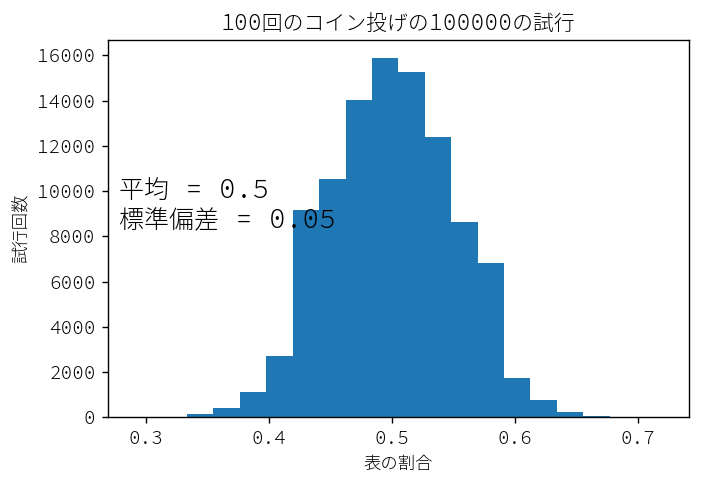

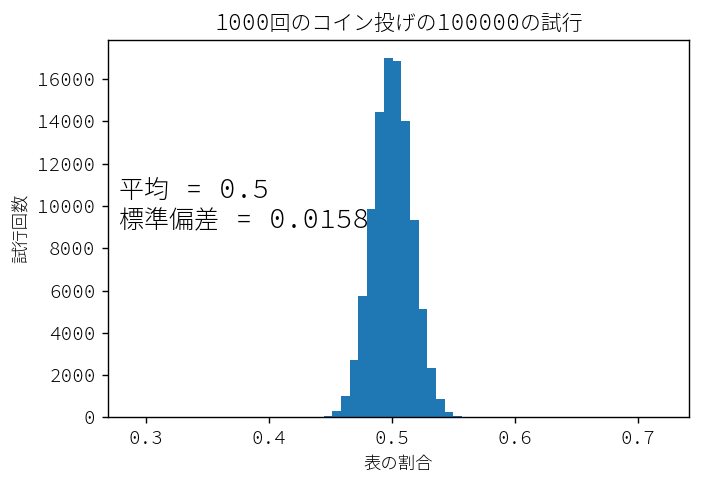

In [37]:
random.seed(0)
makePlots(100,1000,100000)

p.188

In [38]:
def showErrorBars(minExp, maxExp, numTrials):
    """minExp と maxExp は minExp < maxExp を満たす正の整数，
       numTrials は正の整数とする．
       表の割合の平均を誤差棒付きでプロットする"""
    pylab.figure(dpi=125)
    means, sds = [], []
    xVals = []
    for exp in range(minExp, maxExp + 1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals, means,
                   yerr=2*pylab.array(sds))
    pylab.semilogx()
    pylab.title(u'表の割合の平均(' + str(numTrials) + u'回試行)')
    pylab.xlabel(u'1試行当たりの投げた回数')
    pylab.ylabel(u'表の割合と95%信頼区間')

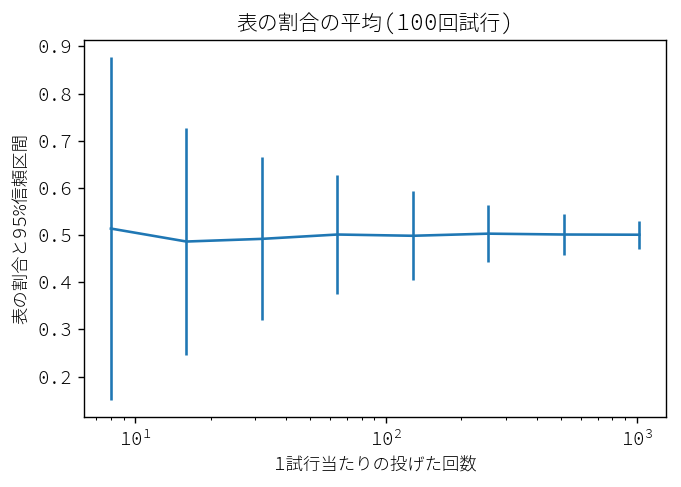

In [39]:
random.seed(0)
showErrorBars(3,10,100)

p.190

In [40]:
def clear(n, p, steps):
    """nとstepsは正の整数、pじゃ浮動小数点数とする
         n: 分子の初期個数
         p: 分子が消失する確率
         steps: シミュレーションの長さ"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel(u'時間')
    pylab.ylabel(u'残存分子')
    pylab.title(u'薬物の除去')

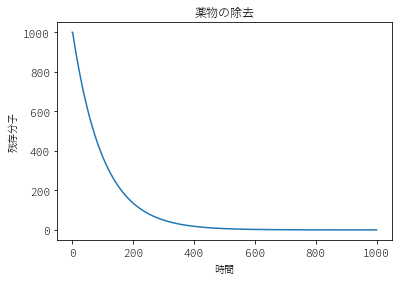

In [41]:
clear(1000, 0.01, 1000)

In [42]:
def clear(n, p, steps):
    """nとstepsは正の整数、pじゃ浮動小数点数とする
         n: 分子の初期個数
         p: 分子が消失する確率
         steps: シミュレーションの長さ"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel(u'時間')
    pylab.ylabel(u'残存分子')
    pylab.title(u'薬物の除去')
    pylab.semilogy()

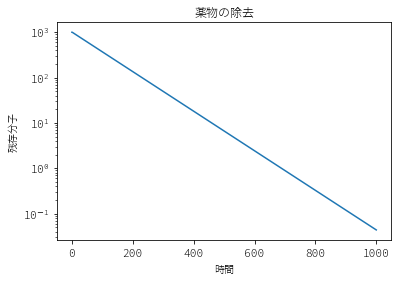

In [43]:
clear(1000, 0.01, 1000)

p.191

In [44]:
def successfulStarts(eventProb, numTrials):
    """eventProb: 1回の試行で成功する確率を表す浮動小数点数
       numTrials: 試行回数を表す正の整数
       成功するのに必要な試行回数を返す"""
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > eventProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

Text(0.5,1,'Probability of Starting Each Try 0.5')

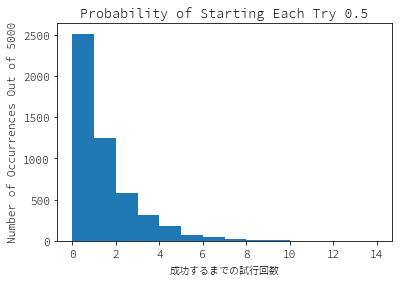

In [45]:
random.seed(0)
probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials)
pylab.hist(distribution, bins = 14)
pylab.xlabel(u'成功するまでの試行回数')
pylab.ylabel(u'Number of Occurrences Out of ' + str(numTrials))
pylab.title('Probability of Starting Each Try ' + str(probOfSuccess))

p.193

In [46]:
def playSeries(numGames, teamProb):
    """Assumes numGames an odd integer,
         teamProb a float between 0 and 1
       Returns True if better team wins series"""
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)

In [47]:
def simSeries(numSeries):
    prob = 0.5
    fracWon = []
    probs = []
    while prob <= 1.0:
        seriesWon = 0.0
        for i in range(numSeries):
            if playSeries(7, prob):
                seriesWon += 1
        fracWon.append(seriesWon/numSeries)
        probs.append(prob)
        prob += 0.01
    pylab.plot(probs, fracWon, linewidth = 5)
    pylab.xlabel('Probability of Winning a Game')
    pylab.ylabel('Probability of Winning a Series') 
    pylab.axhline(0.95) 
    pylab.ylim(0.5, 1.1)
    pylab.title(str(numSeries) + ' Seven-Game Series')

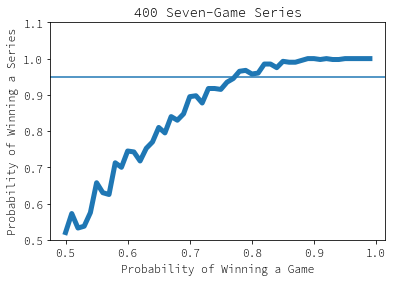

In [48]:
simSeries(400)

p.194

In [49]:
def findSeriesLength(teamProb):
    numSeries = 200
    maxLen = 2500
    step = 10
    
    def fracWon(teamProb, numSeries, seriesLen):
        won = 0.0
        for series in range(numSeries):
            if playSeries(seriesLen, teamProb):
                won += 1
        return won/numSeries
    
    winFrac = []
    xVals = []
    for seriesLen in range(1, maxLen, step):
        xVals.append(seriesLen)
        winFrac.append(fracWon(teamProb, numSeries, seriesLen))
    pylab.plot(xVals, winFrac, linewidth = 5)
    pylab.xlabel('Length of Series')
    pylab.ylabel('Probability of Winning Series')
    pylab.title(str(round(teamProb, 4)) +
                ' Probability of Better Team Winning a Game')
    pylab.axhline(0.95) #draw horizontal line at y = 0.95

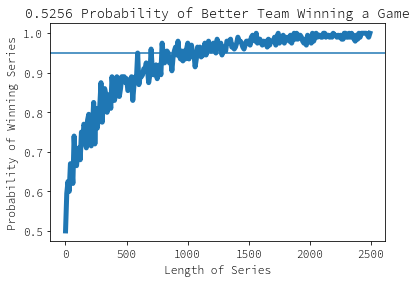

In [50]:
YanksProb = 0.636
PhilsProb = 0.574
findSeriesLength(YanksProb/(YanksProb + PhilsProb))

p.196

In [51]:
def collisionProb(n, k):
    prob = 1.0
    for i in range(1, k):
        prob = prob * ((n - i)/float(n))

p.197

In [52]:
def simInsertions(numIndices, numInsertions):
    """Assumes numIndices and numInsertions are positive ints.
       Returns 1 if there is a collision; 0 otherwise"""
    choices = range(numIndices) #list of possible indices
    used = []
    for i in range(numInsertions):
        hashVal = random.choice(choices)
        if hashVal in used: #there is a collision
            return 1
        else:
            used.append(hashVal)
    return 0

In [53]:
def findProb(numIndices, numInsertions, numTrials):
    collisions = 0.0
    for t in range(numTrials):
        collisions += simInsertions(numIndices, numInsertions)
    return collisions/numTrials

In [54]:
print '衝突率の実際 =', collisionProb(1000, 50)
print '衝突率の予測 =', findProb(1000, 50, 10000)
print '衝突率の実際 =', collisionProb(1000, 200)
print '衝突率の予測 =', findProb(1000, 200, 10000)

衝突率の実際 = None
衝突率の予測 = 0.7118
衝突率の実際 = None
衝突率の予測 = 1.0
